In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white')
import ast
from __future__ import division
from collections import defaultdict
from matplotlib import rc

In [2]:
def get_average_headway(car_data, hl = 12, hs=4, L=4):
    lane1, lane2 = [], []
    num_aut = 0
    for car in car_data:
        temp_data = {'isRobot': car['isRobot'], 'pos': car['pos']}
        if car['isRobot']:
            num_aut += 1
        if car['lane'] < -0.05:
#             lane1.append(temp_data)
            lane1.append((car['pos'], car['isRobot']))
        else:
#             lane2.append(temp_data)
            lane2.append((car['pos'], car['isRobot']))
            
    sorted_lane1, sorted_lane2 = sorted(lane1), sorted(lane2)
    total_headway_lane1, total_headway_lane2 = 0, 0
    for i in xrange(1, len(sorted_lane1)):
        if sorted_lane1[i - 1][1] and sorted_lane1[i][1]:
            total_headway_lane1 += hs
        else:
            total_headway_lane1 += hl
            
    for i in xrange(1, len(sorted_lane2)):
        if sorted_lane2[i-1][1] and sorted_lane2[i][1]:
            total_headway_lane2 += hs
        else:
            total_headway_lane1 += hl
            
    total_headway = total_headway_lane1 + total_headway_lane2
    total_cars = len(sorted_lane1) + len(sorted_lane2) - 1
    frac_aut = num_aut/(total_cars + 1)
    return frac_aut, total_headway/total_cars

In [3]:
filename = "results.txt"
data01, data03, data05, data07, data09 = [], [], [], [], []
capacity_data, capacity_average_data = defaultdict(list), {}
with open(filename, 'r') as f:
    for line in f:
        res_str = line
        dict1 = ast.literal_eval(res_str)
        if dict1['num_cars'] != 20:
            continue
        else:
            frac_aut, average_headway = get_average_headway(dict1['car_data'])
            capacity_data[frac_aut].append(average_headway)
            if dict1['prob_aut'] == 0.1:
                data01.append(average_headway)
            elif dict1['prob_aut'] == 0.3:
                data03.append(average_headway)
            elif dict1['prob_aut'] == 0.5:
                data05.append(average_headway)
            elif dict1['prob_aut'] == 0.7:
                data07.append(average_headway)
            if dict1['prob_aut'] == 0.9:
                data09.append(average_headway)
            
for key in capacity_data.keys():
    capacity_average_data[key] = np.mean(capacity_data[key])
    
print(capacity_average_data)

mean01, mean03, mean05, mean07, mean09 = np.mean(data01), np.mean(data03), \
                                        np.mean(data05), np.mean(data07), np.mean(data09)

{0.75: 6.9473684210526319, 0.5: 8.4210526315789469, 0.3: 9.4035087719298236, 0.2: 10.631578947368421, 0.8: 6.1052631578947363, 0.4: 9.1228070175438578, 0.85: 5.3684210526315788, 0.15: 11.228070175438598, 0.6: 8.0, 0.1: 10.947368421052632, 0.9: 5.1228070175438596, 0.7: 7.2631578947368425, 0.05: 11.368421052631579, 0.35: 9.0526315789473699, 0.95: 4.6315789473684212, 0.65: 8.0, 0.25: 10.021052631578947}


In [4]:
def capacity(alpha, n, hl = 12, hs = 4, L = 4, d=20):
    return n * d/(alpha**2 * hs  + (1 - alpha**2) * hl + L)

def capacity_UB(alpha, n, hl = 12, hs = 4, L = 4, d = 20):
    return n * d/(alpha * hs + (1 - alpha)* hl + L)

n, d, L = 2, 1, 4
x_vals = np.linspace(0,1,100)
capacity_vals = [capacity(alpha, n, d=d) for alpha in x_vals]
capacity_UB_vals = [capacity_UB(alpha, n, d=d) for alpha in x_vals]

capacity_average_data_x = capacity_average_data.keys()
capacity_average_data_y = [2 * d/(avg + L) for avg in capacity_average_data.values()]

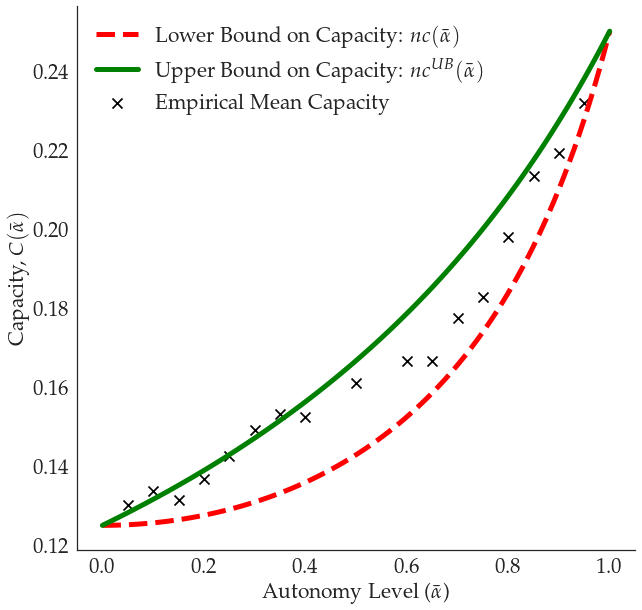

In [10]:
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
plt.figure(figsize=(10,10))
plt.plot(x_vals, capacity_vals, '--',label=r"Lower Bound on Capacity: $nc(\bar{\alpha})$", color='red', linewidth = 5)
plt.plot(x_vals, capacity_UB_vals, label=r"Upper Bound on Capacity: $nc^{UB}(\bar{\alpha})$", color='green', linewidth = 5)
# plt.scatter([0.1,0.3,0.5,0.7,0.9], [n*d/(mean01 + L), n*d/(mean03 + L), n*d/(mean05 + L), \
#                                     n*d/(mean07 + L), n*d/(mean09 + L)], marker='x', \
#             label='Empirical Mean Capacity', color = 'black', s=100)
plt.scatter(capacity_average_data_x, capacity_average_data_y, marker='x',\
            label='Empirical Mean Capacity', color='black', s=100)

# plt.vlines(x = 0.1, ymin = n*d/(max(data01) + L), ymax = n*d/(min(data01) + L))
# plt.vlines(x = 0.3, ymin = n*d/(max(data03) + L), ymax = n*d/(min(data03) + L))
# plt.vlines(x = 0.5, ymin = n*d/(max(data05) + L), ymax = n*d/(min(data05) + L))
# plt.vlines(x = 0.7, ymin = n*d/(max(data07) + L), ymax = n*d/(min(data07) + L))
# plt.vlines(x = 0.9, ymin = n*d/(max(data09) + L), ymax = n*d/(min(data09) + L))
# plt.axis('off')
sns.despine()
plt.xticks(fontsize=21)
plt.yticks(fontsize=21)
plt.legend(prop={'size': 21})
plt.xlabel(r"Autonomy Level ($\bar{\alpha}$)", size=21)
plt.ylabel(r"Capacity, $C(\bar{\alpha})$", size=21)
plt.savefig("capacity_fig.pdf")

In [13]:
min(data09)

4.631578947368421

In [47]:
d/max(data01)

0.9259259259259258

In [48]:
d/min(data01)

1.0416666666666667